In [1]:
from importlib import reload
from pathlib import Path
import pandas as pd
notebooks_dir = Path('.').resolve()
root_dir = notebooks_dir.parents[0]
import sys
import pickle
sys.path.append(str(root_dir))
from settings import ACS_YEAR, ACS_SPAN, RAW_SHAPEFILES_DIR, INTERIM_DIR, MODELS_DIR, PROCESSED_DIR
import settings
def fix_path(path):
    """Hacky fix to make paths behave when importing from upstream module"""
    return Path(str(path).replace('notebooks/', ''))

INTERIM_DIR = fix_path(INTERIM_DIR)
RAW_SHAPEFILES_DIR = fix_path(RAW_SHAPEFILES_DIR)
MODELS_DIR = fix_path(MODELS_DIR)
PROCESSED_DIR = fix_path(PROCESSED_DIR)

In [4]:
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline

### Load data

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors1 = plt.cm.Set2(np.linspace(0, 1, 8))
colors2 = plt.cm.Set3(np.linspace(0, 1, 10))
colors = np.vstack((colors1, colors2))
# mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# mcolors.Colormap('my_colormap', colors)
newcmp = ListedColormap(colors, name='my_colormap')


NameError: name 'np' is not defined

In [108]:
def make_data(geo_src,
              df,
              df_orig=None,
              counties=None):
    """Prepare data to be mapped"""
    gdf = gpd.read_file(f'zip://{geo_src}')
    gdf.columns = [x.lower() for x in gdf]
    if counties is not None:
        df = df.query('county_geoid.isin(@counties)')
    c1 = ['geoid', 'geometry']
    out = gdf[c1].merge(df.reset_index(), on='geoid', how='left').dropna()
    if 'cluster' in out:
        out['cluster'] = out['cluster'].astype(int)
    return out

def make_maps(df,
              title,
              di,
              ncols=2,
              row_height=None,
              dissolve=False,
              legend=True):
    """Generate tract-level maps for comparison"""
    nrows = int(len(di) / ncols)
    if row_height is None:
        figsize = (16, nrows * 6)
    else:
        figsize = (16, row_height)
    f, axes = plt.subplots(nrows=nrows,
                           ncols=ncols,
                           figsize=figsize,
                           sharex=True,
                           sharey=True)
    counter = 0
    for label, d in di.items():
        frame = df.copy()[['geoid', label, 'geometry']]
        if dissolve:
            frame = frame.dissolve(by=label).reset_index()
        if d['cmap'] == 'tab20':
            ax = frame.plot(column=label,
                            ax=axes.flat[counter],
                            categorical=True,
                            legend=True,
                            cmap='tab20')
        else:
            ax = frame.plot(column=label,
                           ax=axes.flat[counter],
                           cmap=d['cmap'])
        ax.title.set_text(d['title'])
        ax.axis('off')
        counter += 1
        f.suptitle(title, y=0.9, fontsize=15)
        f.subplots_adjust(hspace=0.0, wspace=0.0)
        plt.show()
        
di = {'cluster': {'title': 'Clusters', 'cmap': 'tab20'},
      'housing__b25001__total': {'title': 'Total Housing Units', 'cmap': 'PuBuGn'},
      'housing__b25002__vacant': {'title': 'Vacant Units', 'cmap': 'PuBuGn'},
      'race__b02008__total': {'title': '% White', 'cmap': 'PuBuGn'},
      'race__b02009__total': {'title': '% Black', 'cmap': 'PuBuGn'},
      'inc__b19081__third_quintile': {'title': 'Mean HH Income', 'cmap': 'PuBuGn'},
      'age_sex__b01002__total': {'title': 'Median Age', 'cmap': 'PuBuGn'},
      'edu_attain__b15011__total': {'title': '% w/ Bachelors+', 'cmap': 'PuBuGn'},
      'emp_status__b23020__male': {'title': 'Mean Male Hours Worked', 'cmap': 'PuBuGn'},
      'emp_status__b23020__female': {'title': 'Mean Female Hours Worked', 'cmap': 'PuBuGn'}}

In [105]:
di

{'cluster': {'title': 'Clusters', 'cmap': 'Set3'},
 'housing__b25001__total': {'title': 'Total Housing Units', 'cmap': 'PuBuGn'},
 'housing__b25002__vacant': {'title': 'Vacant Units', 'cmap': 'PuBuGn'},
 'race__b02008__total': {'title': '% White', 'cmap': 'PuBuGn'},
 'race__b02009__total': {'title': '% Black', 'cmap': 'PuBuGn'},
 'inc__b19081__third_quintile': {'title': 'Mean HH Income', 'cmap': 'PuBuGn'},
 'age_sex__b01002__total': {'title': 'Median Age', 'cmap': 'PuBuGn'},
 'edu_attain__b15011__total': {'title': '% w/ Bachelors+', 'cmap': 'PuBuGn'},
 'emp_status__b23020__male': {'title': 'Mean Male Hours Worked',
  'cmap': 'PuBuGn'},
 'emp_status__b23020__female': {'title': 'Mean Female Hours Worked',
  'cmap': 'PuBuGn'}}

In [95]:
import matplotlib.colors as mcolors

In [83]:
import numpy as np
colors1 = plt.cm.binary(np.linspace(0., 1, 128))
colors1
# colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 128))

array([[1.        , 1.        , 1.        , 1.        ],
       [0.99215686, 0.99215686, 0.99215686, 1.        ],
       [0.98431373, 0.98431373, 0.98431373, 1.        ],
       [0.97647059, 0.97647059, 0.97647059, 1.        ],
       [0.96862745, 0.96862745, 0.96862745, 1.        ],
       [0.96078431, 0.96078431, 0.96078431, 1.        ],
       [0.95294118, 0.95294118, 0.95294118, 1.        ],
       [0.94509804, 0.94509804, 0.94509804, 1.        ],
       [0.9372549 , 0.9372549 , 0.9372549 , 1.        ],
       [0.92941176, 0.92941176, 0.92941176, 1.        ],
       [0.92156863, 0.92156863, 0.92156863, 1.        ],
       [0.91372549, 0.91372549, 0.91372549, 1.        ],
       [0.90588235, 0.90588235, 0.90588235, 1.        ],
       [0.89803922, 0.89803922, 0.89803922, 1.        ],
       [0.89019608, 0.89019608, 0.89019608, 1.        ],
       [0.88235294, 0.88235294, 0.88235294, 1.        ],
       [0.8745098 , 0.8745098 , 0.8745098 , 1.        ],
       [0.86666667, 0.86666667,

In [33]:
gm_src = MODELS_DIR / 'gaussian_mixture.pkl'
ce_src = MODELS_DIR / 'corex.pkl'
df_src = PROCESSED_DIR / 'labeled.pkl'
df_orig_src = PROCESSED_DIR / 'labeled_orig.pkl'

with open(str(ce_src), 'rb') as f:
    ce_model = pickle.load(f)
with open(str(gm_src), 'rb') as f:
    gm_model = pickle.load(f)

df = pd.read_pickle(df_src)
df_orig = pd.read_pickle(df_orig_src)
df['county_geoid'] = df.reset_index()['geoid'].str[:5].tolist()
df_orig['county_geoid'] = df_orig.reset_index()['geoid'].str[:5].tolist()
token = 'pk.eyJ1IjoicGV0ZXJncmFzbXVzc2VuIiwiYSI6ImNrZnFxbDB5bDA2cmwycm84ZnlsNG5uZ2UifQ.1KhOA5e84Y_U1x96owQJ1A'

In [36]:
var_table = pd.DataFrame([x.split('__') for x in df if len(x.split('__')) > 1 and (not x.startswith('mi'))], columns=['subj_abbr', 'table_code', 'table_var'])
var_table['col'] = var_table.subj_abbr + '__' + var_table.table_code + '__' + var_table.table_var

table_code = 'B25126'
var_table.query('table_code==@table_code.lower()')

,subj_abbr,table_code,table_var,col


<Figure size 1600x480 with 0 Axes>

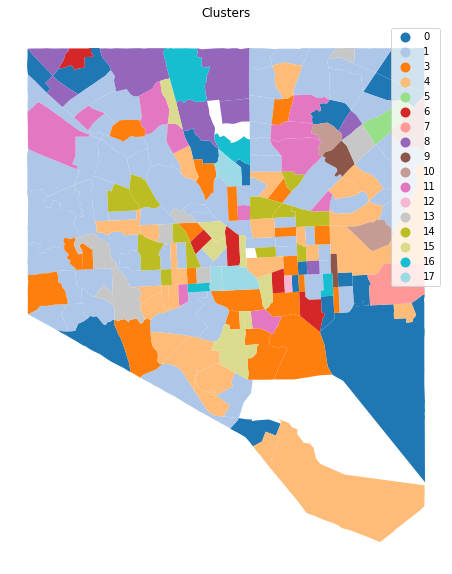

<Figure size 1600x480 with 0 Axes>

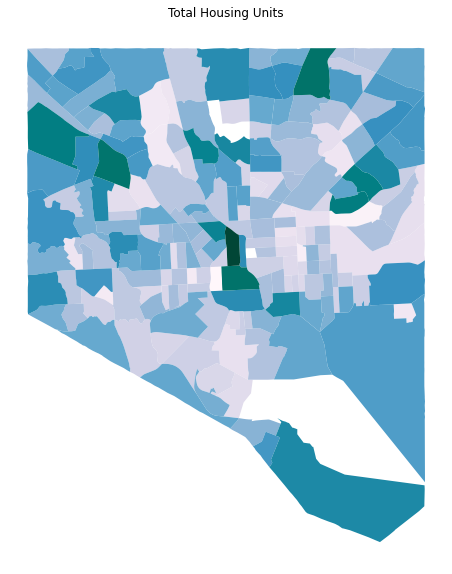

<Figure size 1600x480 with 0 Axes>

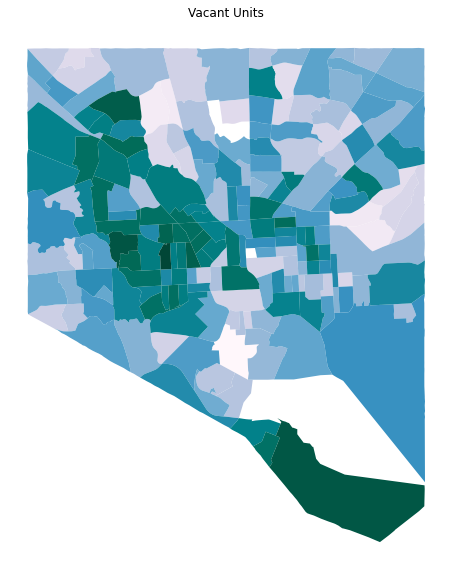

<Figure size 1600x480 with 0 Axes>

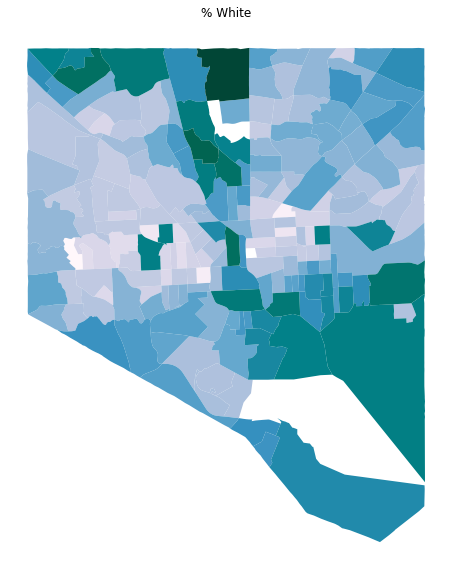

<Figure size 1600x480 with 0 Axes>

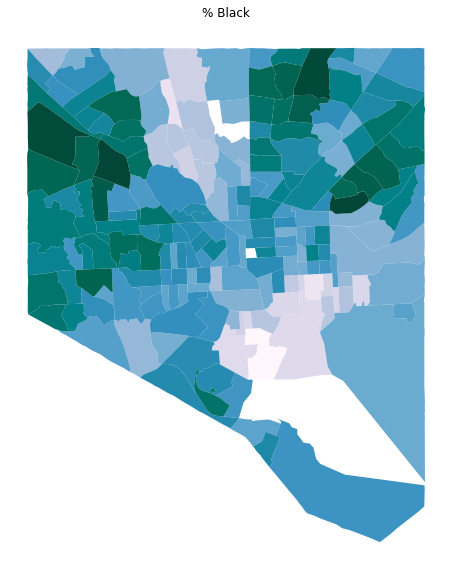

<Figure size 1600x480 with 0 Axes>

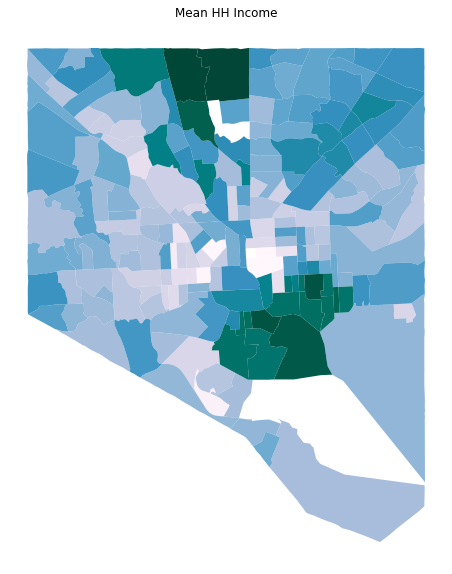

<Figure size 1600x480 with 0 Axes>

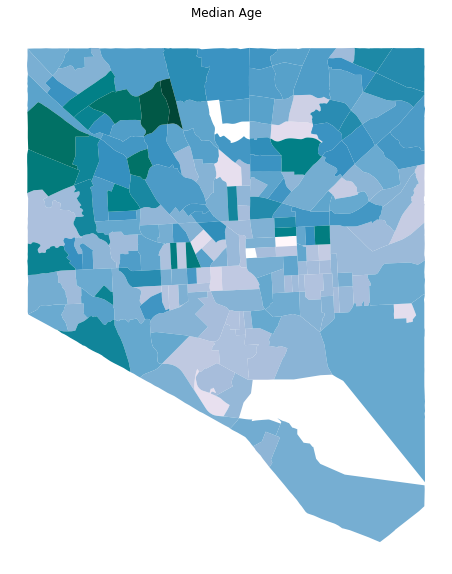

<Figure size 1600x480 with 0 Axes>

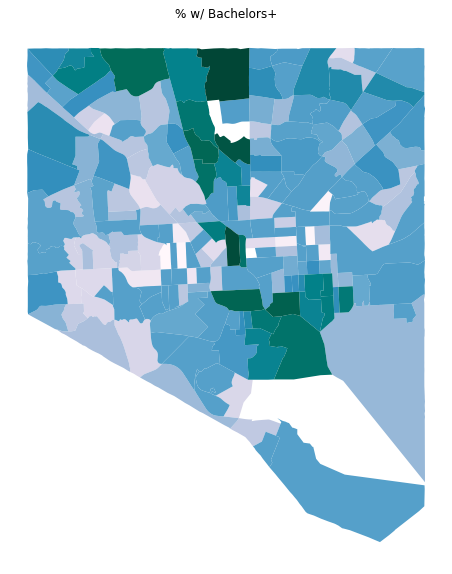

<Figure size 1600x480 with 0 Axes>

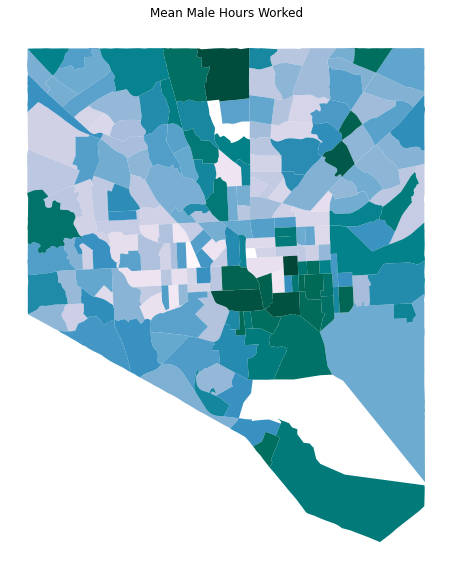

<Figure size 1600x480 with 0 Axes>

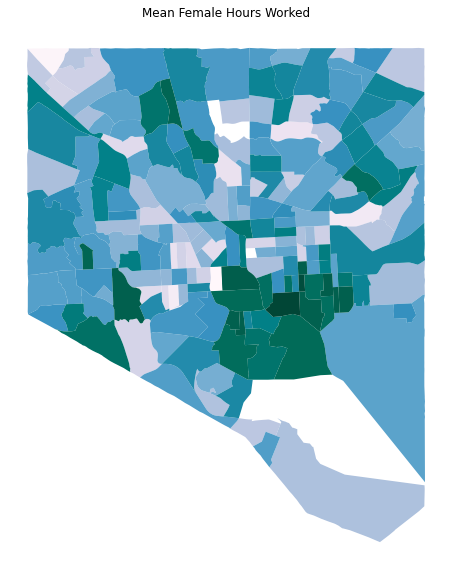

In [116]:

md_geo_src = RAW_SHAPEFILES_DIR / 'tl_2018_24_tract.zip'
gdf = make_data(md_geo_src, df, counties=['24510'])

for label, d in di.items():
    figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    d = di[label]
    frame = gdf.copy()[['geoid', label, 'geometry']].sort_values(by=label)
    if d['cmap'] == 'tab20':
        ax = frame.plot(column=label,
                        categorical=True,
                        cmap=d['cmap'], legend=True, figsize=(10, 10))
    else:
        ax = frame.plot(column=label,
                       cmap=d['cmap'], figsize=(10, 10))
    ax.title.set_text(d['title'])
    ax.axis('off')
    plt.show()

<Figure size 1600x480 with 0 Axes>

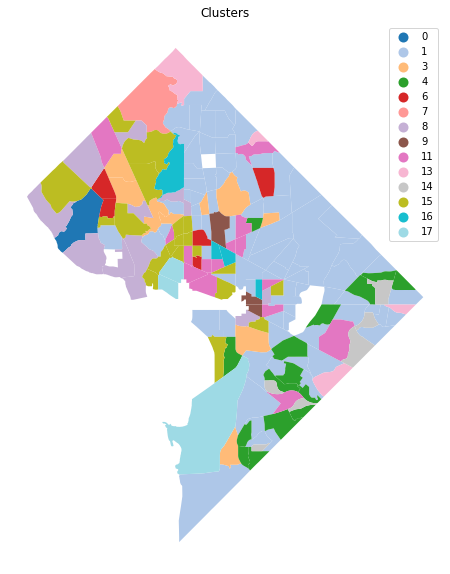

<Figure size 1600x480 with 0 Axes>

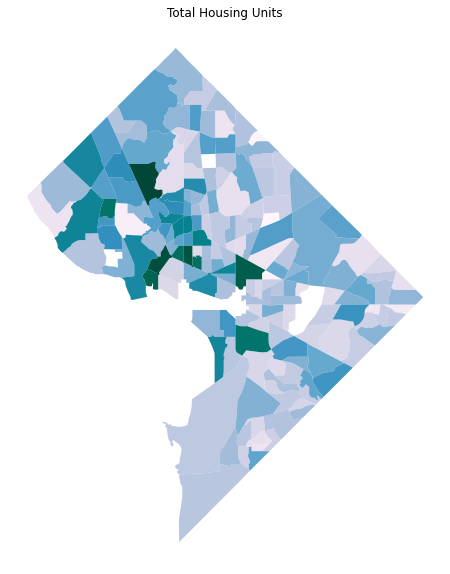

<Figure size 1600x480 with 0 Axes>

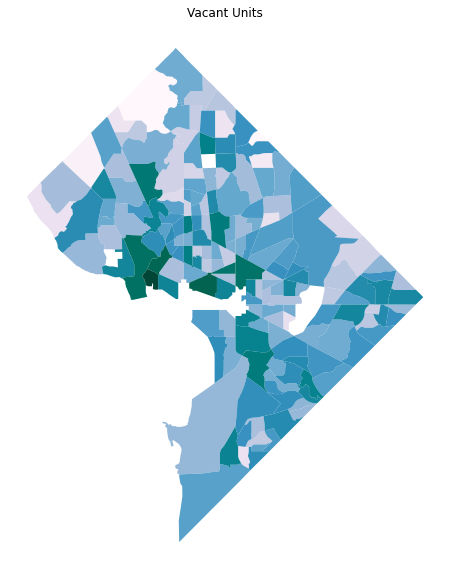

<Figure size 1600x480 with 0 Axes>

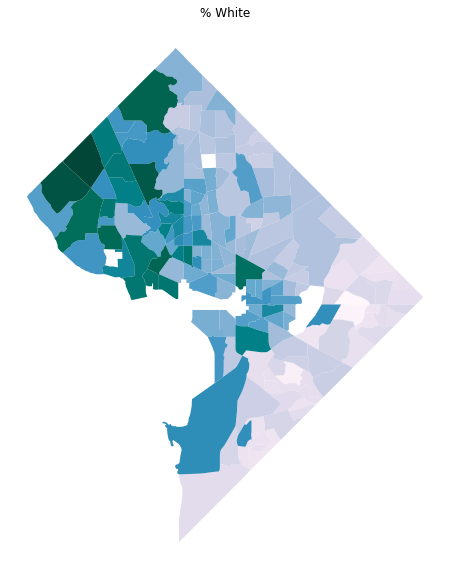

<Figure size 1600x480 with 0 Axes>

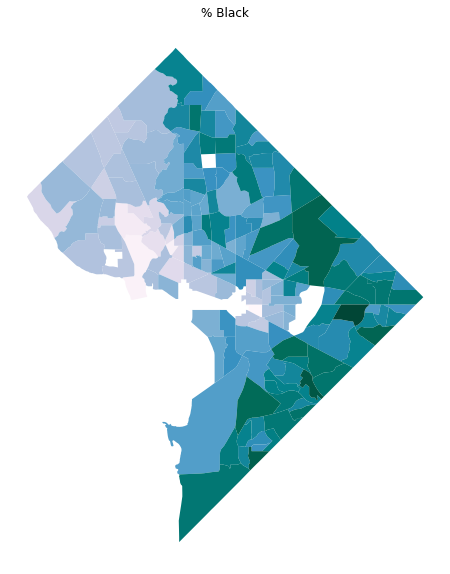

<Figure size 1600x480 with 0 Axes>

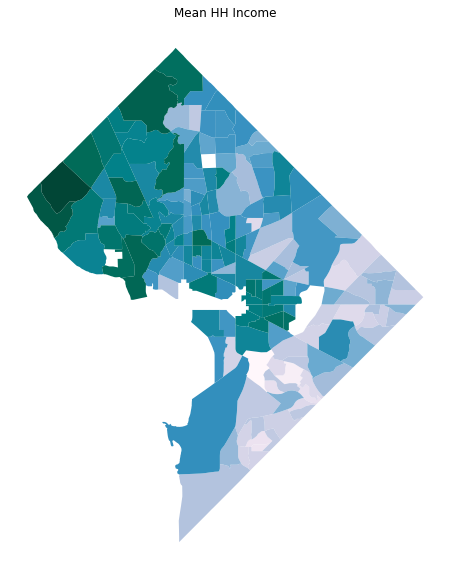

<Figure size 1600x480 with 0 Axes>

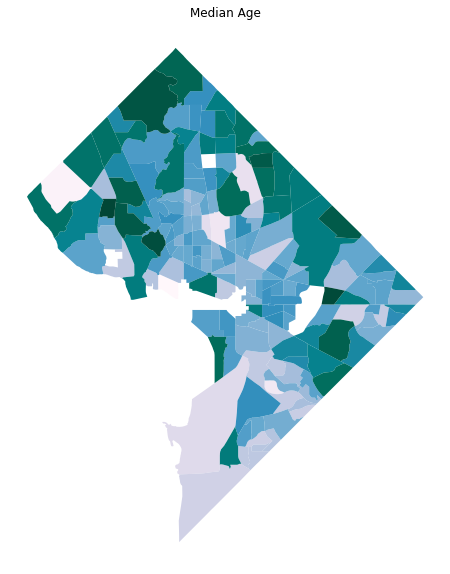

<Figure size 1600x480 with 0 Axes>

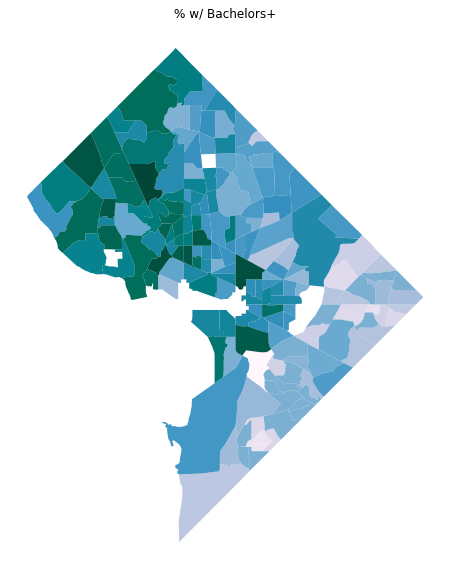

<Figure size 1600x480 with 0 Axes>

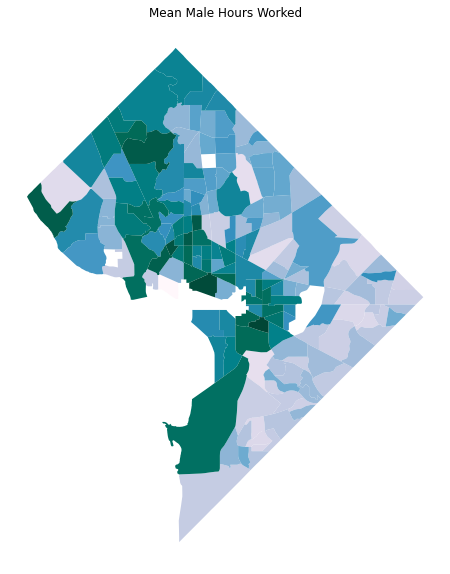

<Figure size 1600x480 with 0 Axes>

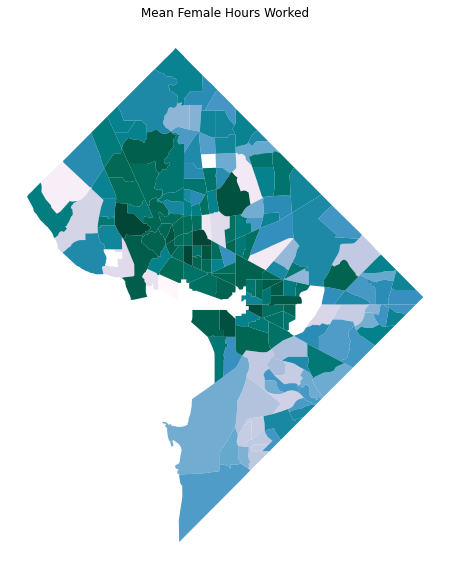

In [117]:

md_geo_src = RAW_SHAPEFILES_DIR / 'tl_2018_11_tract.zip'
gdf = make_data(md_geo_src, df, counties=['11001'])

for label, d in di.items():
    figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    d = di[label]
    frame = gdf.copy()[['geoid', label, 'geometry']].sort_values(by=label)
    if d['cmap'] == 'tab20':
        ax = frame.plot(column=label,
                        categorical=True,
                        cmap=d['cmap'], legend=True, figsize=(10, 10))
    else:
        ax = frame.plot(column=label,
                       cmap=d['cmap'], figsize=(10, 10))
    ax.title.set_text(d['title'])
    ax.axis('off')
    plt.show()

<Figure size 1600x480 with 0 Axes>

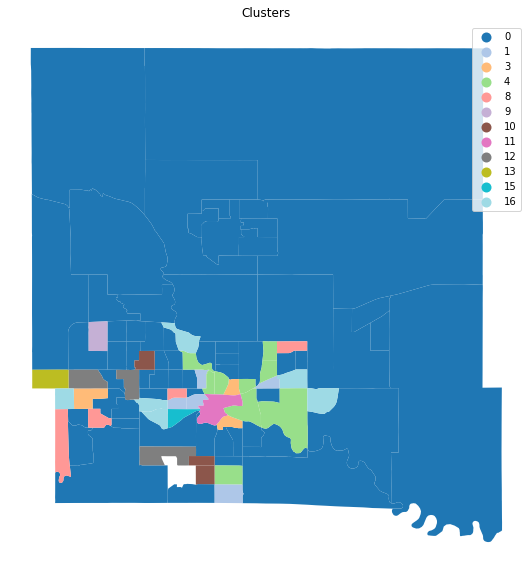

<Figure size 1600x480 with 0 Axes>

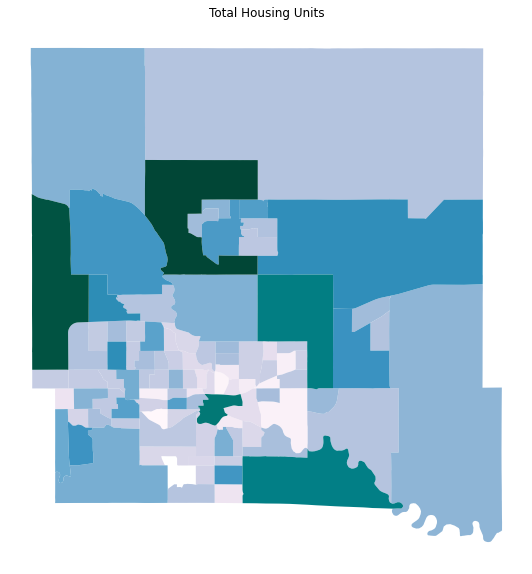

<Figure size 1600x480 with 0 Axes>

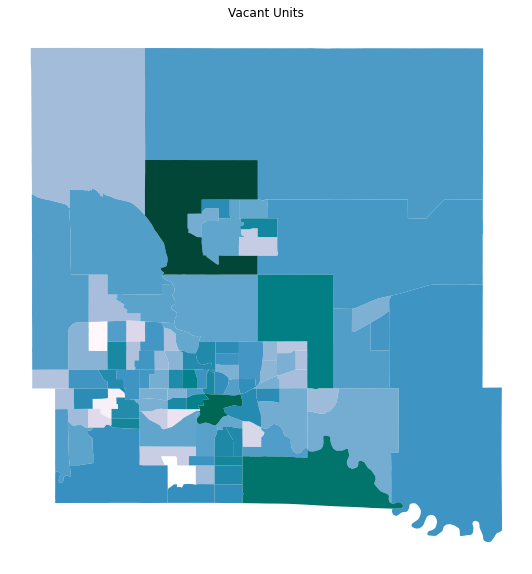

<Figure size 1600x480 with 0 Axes>

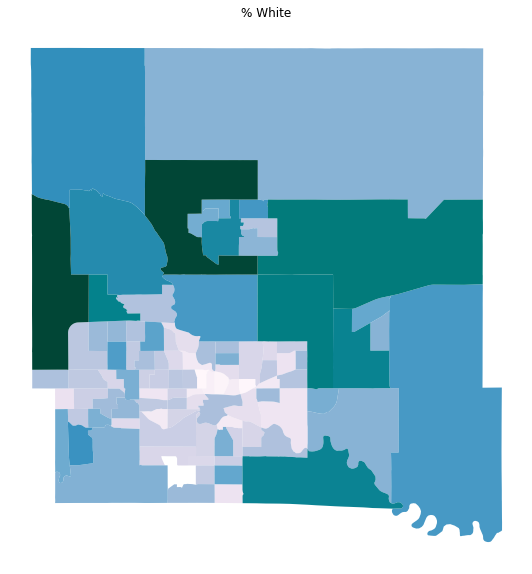

<Figure size 1600x480 with 0 Axes>

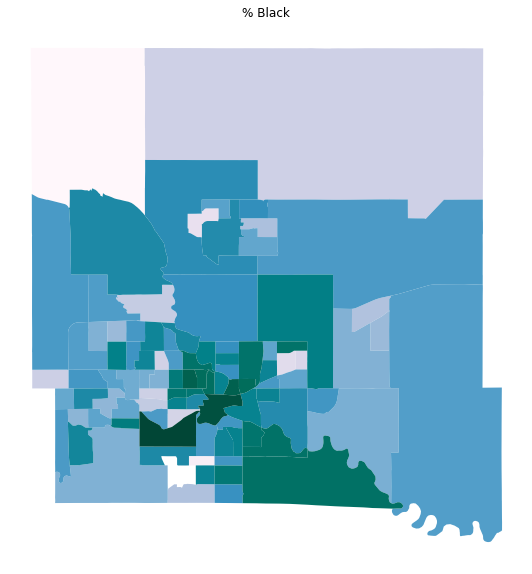

<Figure size 1600x480 with 0 Axes>

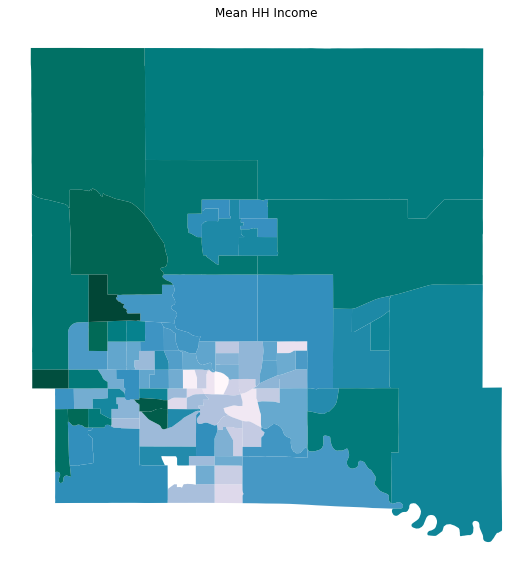

<Figure size 1600x480 with 0 Axes>

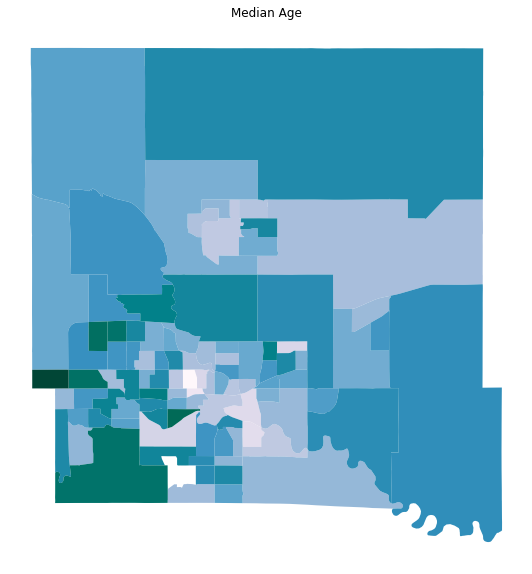

<Figure size 1600x480 with 0 Axes>

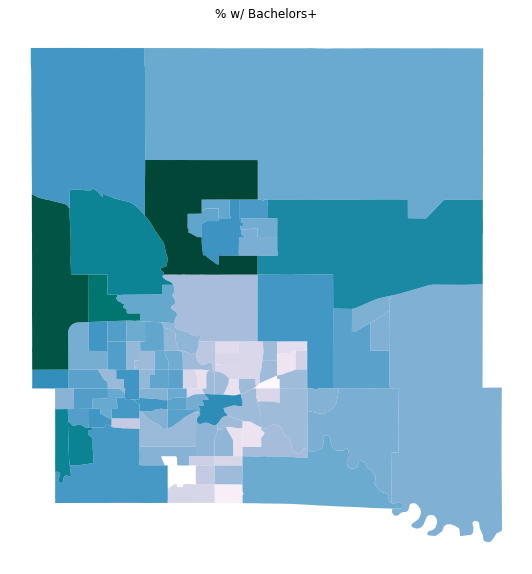

<Figure size 1600x480 with 0 Axes>

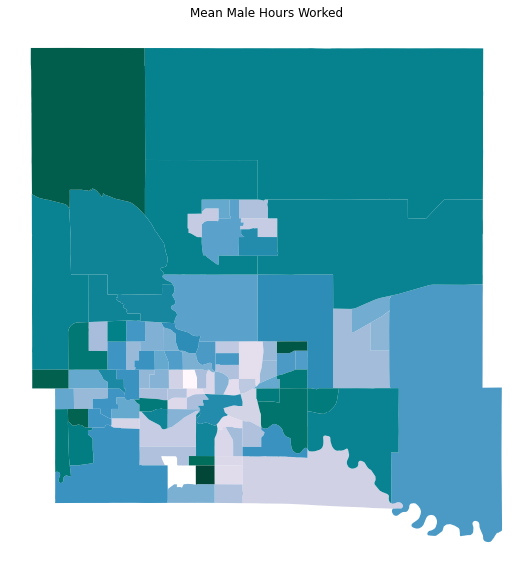

<Figure size 1600x480 with 0 Axes>

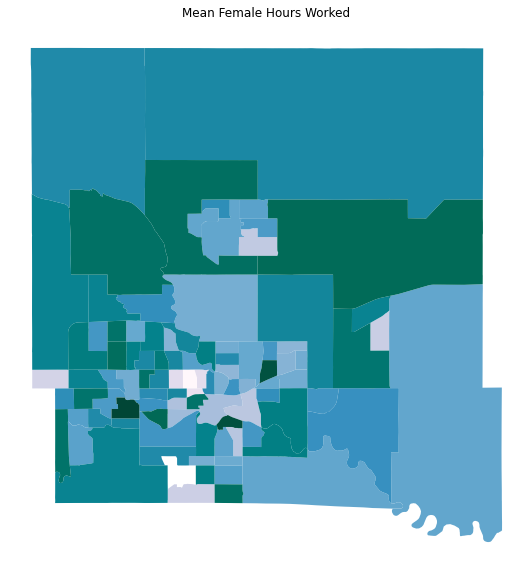

In [118]:

md_geo_src = RAW_SHAPEFILES_DIR / 'tl_2018_19_tract.zip'
gdf = make_data(md_geo_src, df, counties=['19153'])

for label, d in di.items():
    figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
    d = di[label]
    frame = gdf.copy()[['geoid', label, 'geometry']].sort_values(by=label)
    if d['cmap'] == 'tab20':
        ax = frame.plot(column=label,
                        categorical=True,
                        cmap=d['cmap'], legend=True, figsize=(10, 10))
    else:
        ax = frame.plot(column=label,
                       cmap=d['cmap'], figsize=(10, 10))
    ax.title.set_text(d['title'])
    ax.axis('off')
    plt.show()

In [ ]:
get_zips(url, dst)

In [ ]:
r.